# TensorFlow 教程-图像分类

In [7]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



2.0.0-alpha0


## 1.获取Fashion MNIST数据集
本指南使用Fashion MNIST数据集，该数据集包含10个类别中的70,000个灰度图像。 图像显示了低分辨率（28 x 28像素）的单件服装，如下所示：
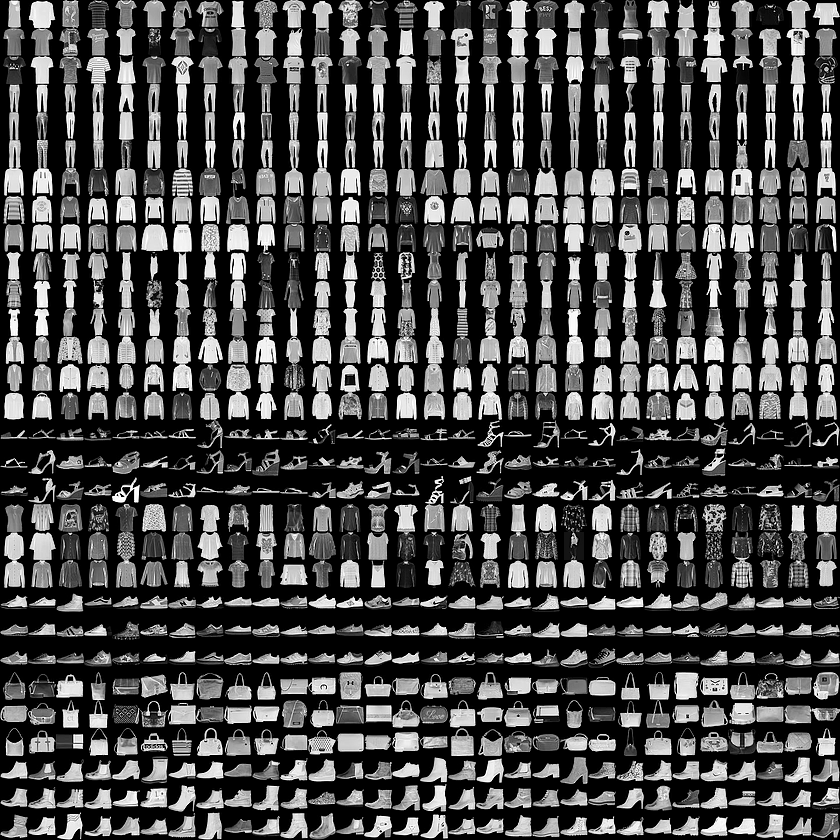

Fashion MNIST旨在替代经典的MNIST数据集，通常用作计算机视觉机器学习计划的“Hello，World”。

我们将使用60,000张图像来训练网络和10,000张图像，以评估网络学习图像分类的准确程度。

In [8]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

图像是28x28 NumPy数组，像素值介于0到255之间。标签是一个整数数组，范围从0到9.这些对应于图像所代表的服装类别：

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

每个图像都映射到一个标签。 由于类名不包含在数据集中，因此将它们存储在此处以便在绘制图像时使用：

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2.探索数据
让我们在训练模型之前探索数据集的格式。 以下显示训练集中有60,000个图像，每个图像表示为28 x 28像素：

In [10]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 3.处理数据
图片展示

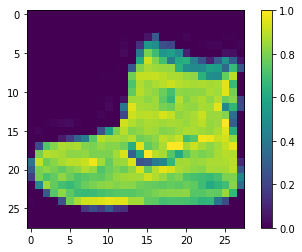

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

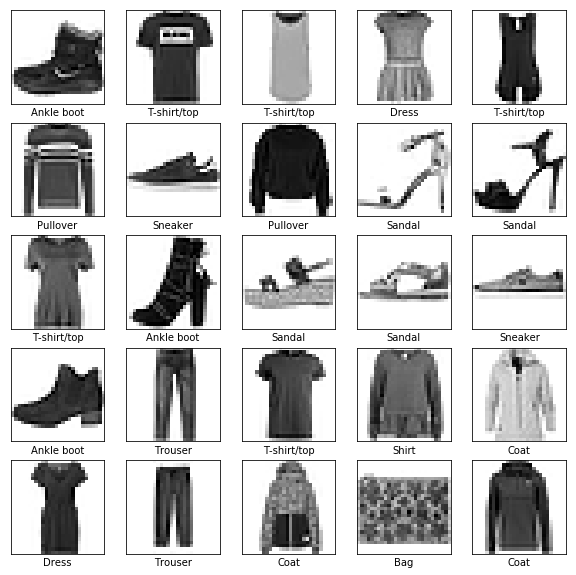

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4.构造网络

In [18]:
model = keras.Sequential(
[
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 5.训练与验证

In [20]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4970 - accuracy: 0.8264
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3766 - accuracy: 0.8651
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3370 - accuracy: 0.8777
Epoch 4/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3122 - accuracy: 0.8859
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2949 - accuracy: 0.8921


In [21]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.3623 - accuracy: 0.8737


[0.3623474566936493, 0.8737]

## 6.预测

In [26]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[2.1831402e-05 1.0357383e-06 1.0550731e-06 1.3231372e-06 8.0873624e-06
 2.6805745e-02 1.2466960e-05 1.6174167e-01 1.4259206e-04 8.1126428e-01]
9
9


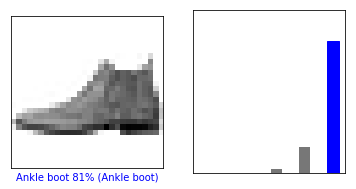

In [27]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

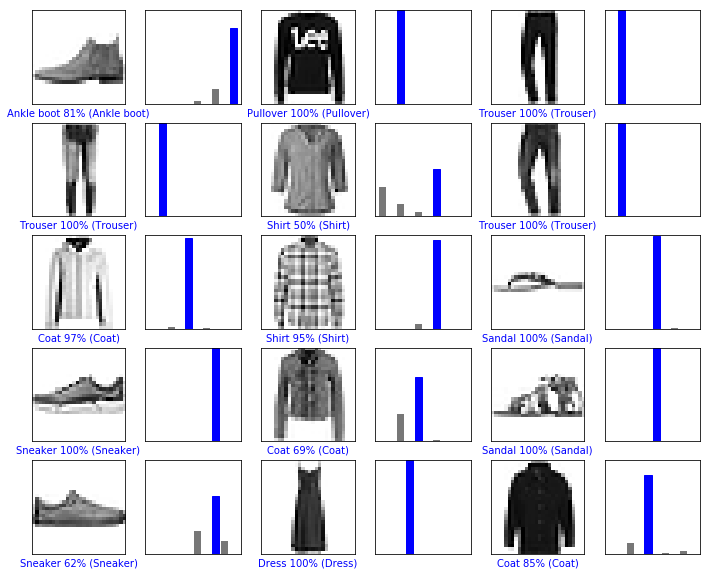

In [28]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(1, 28, 28)
[[2.1831380e-05 1.0357381e-06 1.0550700e-06 1.3231397e-06 8.0873460e-06
  2.6805779e-02 1.2466959e-05 1.6174166e-01 1.4259205e-04 8.1126422e-01]]


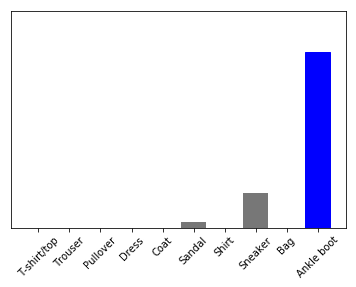

In [30]:
img = test_images[0]

img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)